### Simple LigthGBM Implementation

In [4]:
import lightgbm as lgb
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
import os

# Define paths (following the structure from preprocess_prediction.ipynb)
BASE_PATH = os.path.abspath('..')
PROCESSED_DATA_PATH = os.path.join(BASE_PATH, 'data', 'processed')

# Load the preprocessed data
X_train = pd.read_csv(os.path.join(PROCESSED_DATA_PATH, 'X_train.csv'))
X_test = pd.read_csv(os.path.join(PROCESSED_DATA_PATH, 'X_test.csv'))
X_valid = pd.read_csv(os.path.join(PROCESSED_DATA_PATH, 'X_valid.csv'))

y_train = pd.read_csv(os.path.join(PROCESSED_DATA_PATH, 'y_train.csv'))
y_test = pd.read_csv(os.path.join(PROCESSED_DATA_PATH, 'y_test.csv'))
y_valid = pd.read_csv(os.path.join(PROCESSED_DATA_PATH, 'y_valid.csv'))

# Define parameters for LightGBM
params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': -1,
    'n_estimators': 100
}

# Train the model using sklearn's API
model = lgb.LGBMClassifier(**params)
model.fit(X_train, y_train['target'])

# Make predictions
y_pred_proba = model.predict_proba(X_test)[:, 1]
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test['target'], y_pred)
roc_auc = roc_auc_score(y_test['target'], y_pred_proba)
report = classification_report(y_test['target'], y_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')
print('\nClassification Report:')
print(report)

# Feature importance
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

print('\nTop 10 Most Important Features:')
print(feature_importance.head(10))

# Save the model using joblib
from joblib import dump
dump(model, 'lightgbm_model.joblib')

Accuracy: 0.9168
ROC AUC: 0.9349

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      7309
           1       0.65      0.58      0.61       928

    accuracy                           0.92      8237
   macro avg       0.80      0.77      0.78      8237
weighted avg       0.91      0.92      0.91      8237


Top 10 Most Important Features:
                                      feature  importance
29                   scaled__scaler__duration         674
35                  scaled__scaler__euribor3m         519
28                        scaled__scaler__age         341
30                   scaled__scaler__campaign         143
33             scaled__scaler__cons_price_idx         128
32               scaled__scaler__emp_var_rate         117
34              scaled__scaler__cons_conf_idx         113
37           pass__passthrough__pdays_missing          84
36                scaled__scaler__nr_employed          75
23 

['lightgbm_model.joblib']

### Drop Mutual Information

In [3]:
import lightgbm as lgb
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
import os

# Define paths (following the structure from preprocess_prediction.ipynb)
BASE_PATH = os.path.abspath('..')
PROCESSED_DATA_PATH = os.path.join(BASE_PATH, 'data', 'processed')

# Load the preprocessed data
X_train = pd.read_csv(os.path.join(PROCESSED_DATA_PATH, 'X_train.csv'))
X_test = pd.read_csv(os.path.join(PROCESSED_DATA_PATH, 'X_test.csv'))
X_valid = pd.read_csv(os.path.join(PROCESSED_DATA_PATH, 'X_valid.csv'))

y_train = pd.read_csv(os.path.join(PROCESSED_DATA_PATH, 'y_train.csv'))
y_test = pd.read_csv(os.path.join(PROCESSED_DATA_PATH, 'y_test.csv'))
y_valid = pd.read_csv(os.path.join(PROCESSED_DATA_PATH, 'y_valid.csv'))

# drop colums
columns_to_drop = ['scaled__scaler__nr_employed', 'scaled__scaler__emp_var_rate']
X_train = X_train.drop(columns=columns_to_drop)
X_test = X_test.drop(columns=columns_to_drop)
X_valid = X_valid.drop(columns=columns_to_drop)


# Define parameters for LightGBM
params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': -1,
    'n_estimators': 100
}

# Train the model using sklearn's API
model = lgb.LGBMClassifier(**params)
model.fit(X_train, y_train['target'])

# Make predictions
y_pred_proba = model.predict_proba(X_test)[:, 1]
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test['target'], y_pred)
roc_auc = roc_auc_score(y_test['target'], y_pred_proba)
report = classification_report(y_test['target'], y_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')
print('\nClassification Report:')
print(report)

# Feature importance
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

print('\nTop 10 Most Important Features:')
print(feature_importance.head(10))

# Save the model using joblib
from joblib import dump
dump(model, 'lightgbm_model.joblib')

Accuracy: 0.8374
ROC AUC: 0.8683

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.87      0.91      7309
           1       0.36      0.55      0.43       928

    accuracy                           0.84      8237
   macro avg       0.65      0.71      0.67      8237
weighted avg       0.87      0.84      0.85      8237


Top 10 Most Important Features:
                                      feature  importance
34                  scaled__scaler__euribor3m         658
29                   scaled__scaler__duration         636
28                        scaled__scaler__age         373
33              scaled__scaler__cons_conf_idx         158
32             scaled__scaler__cons_price_idx         142
30                   scaled__scaler__campaign         131
35           pass__passthrough__pdays_missing          82
19        categorical__binary_encode__month_0          69
23  categorical__binary_encode__day_of_week_0          62
22 

['lightgbm_model.joblib']

### Cross Validation: stratified k fold

Parameters: {'num_leaves': np.int64(84), 'learning_rate': 0.0631960890611875, 'feature_fraction': 0.9118764001091078, 'bagging_fraction': 0.8387400631785948, 'bagging_freq': np.int64(5), 'n_estimators': np.int64(65)}
CV Results: {'roc_auc': np.float64(0.9476630989535092), 'accuracy': np.float64(0.913200047518645), 'precision': np.float64(0.6360356087447722), 'recall': np.float64(0.5395147436808184), 'f1': np.float64(0.583498345509837)}
Parameters: {'num_leaves': np.int64(57), 'learning_rate': 0.10677549723031633, 'feature_fraction': 0.6571467271687763, 'bagging_fraction': 0.8603553891795412, 'bagging_freq': np.int64(2), 'n_estimators': np.int64(158)}
CV Results: {'roc_auc': np.float64(0.9456572953897494), 'accuracy': np.float64(0.9123095805333371), 'precision': np.float64(0.6317373589314105), 'recall': np.float64(0.5344871678958449), 'f1': np.float64(0.5786543182829744)}


/home/me/Docs/c21-56-t-data-bi/.conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/me/Docs/c21-56-t-data-bi/.conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/me/Docs/c21-56-t-data-bi/.conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

Parameters: {'num_leaves': np.int64(95), 'learning_rate': 0.010225842093894155, 'feature_fraction': 0.9968846237164871, 'bagging_fraction': 0.8469926038510867, 'bagging_freq': np.int64(6), 'n_estimators': np.int64(51)}
CV Results: {'roc_auc': np.float64(0.9422821941836), 'accuracy': np.float64(0.8873421841039653), 'precision': np.float64(0.0), 'recall': np.float64(0.0), 'f1': np.float64(0.0)}
Parameters: {'num_leaves': np.int64(22), 'learning_rate': 0.16218465147493288, 'feature_fraction': 0.7599443886861023, 'bagging_fraction': 0.6186662652854461, 'bagging_freq': np.int64(8), 'n_estimators': np.int64(85)}
CV Results: {'roc_auc': np.float64(0.9451889121844994), 'accuracy': np.float64(0.9112577106247155), 'precision': np.float64(0.6264195946511185), 'recall': np.float64(0.5298083256913321), 'f1': np.float64(0.5738219423332915)}
Parameters: {'num_leaves': np.int64(27), 'learning_rate': 0.18933194270659534, 'feature_fraction': 0.7529847965068651, 'bagging_fraction': 0.9932923543227153, 'b

/home/me/Docs/c21-56-t-data-bi/.conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/me/Docs/c21-56-t-data-bi/.conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/me/Docs/c21-56-t-data-bi/.conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

Parameters: {'num_leaves': np.int64(20), 'learning_rate': 0.01, 'feature_fraction': 0.609754885469677, 'bagging_fraction': 0.6474698273105927, 'bagging_freq': np.int64(2), 'n_estimators': np.int64(60)}
CV Results: {'roc_auc': np.float64(0.9395966480929616), 'accuracy': np.float64(0.8873421841039653), 'precision': np.float64(0.0), 'recall': np.float64(0.0), 'f1': np.float64(0.0)}
Parameters: {'num_leaves': np.int64(22), 'learning_rate': 0.2785966451631759, 'feature_fraction': 0.6025516836172621, 'bagging_fraction': 0.7521775592291418, 'bagging_freq': np.int64(5), 'n_estimators': np.int64(169)}
CV Results: {'roc_auc': np.float64(0.9402585595379367), 'accuracy': np.float64(0.9091129446307082), 'precision': np.float64(0.6115861207620921), 'recall': np.float64(0.5319730571018948), 'f1': np.float64(0.5687551786369714)}
Parameters: {'num_leaves': np.int64(73), 'learning_rate': 0.01, 'feature_fraction': 0.6, 'bagging_fraction': 0.8266373645869736, 'bagging_freq': np.int64(4), 'n_estimators': n

/home/me/Docs/c21-56-t-data-bi/.conda/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/me/Docs/c21-56-t-data-bi/.conda/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


Fold 1 ROC-AUC: 0.9560


/home/me/Docs/c21-56-t-data-bi/.conda/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/me/Docs/c21-56-t-data-bi/.conda/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


Fold 2 ROC-AUC: 0.9488


/home/me/Docs/c21-56-t-data-bi/.conda/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/me/Docs/c21-56-t-data-bi/.conda/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


Fold 3 ROC-AUC: 0.9514


/home/me/Docs/c21-56-t-data-bi/.conda/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/me/Docs/c21-56-t-data-bi/.conda/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


Fold 4 ROC-AUC: 0.9460


/home/me/Docs/c21-56-t-data-bi/.conda/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/me/Docs/c21-56-t-data-bi/.conda/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


Fold 5 ROC-AUC: 0.9446

Mean CV ROC-AUC: 0.9494 (+/- 0.0041)

Test Set Performance:
Accuracy: 0.9176
ROC-AUC: 0.9342

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      7309
           1       0.66      0.55      0.60       928

    accuracy                           0.92      8237
   macro avg       0.80      0.76      0.78      8237
weighted avg       0.91      0.92      0.91      8237


Top 10 Most Important Features:
                                feature  importance
29             scaled__scaler__duration         870
35            scaled__scaler__euribor3m         651
28                  scaled__scaler__age         449
32         scaled__scaler__emp_var_rate         199
33       scaled__scaler__cons_price_idx         166
34        scaled__scaler__cons_conf_idx         156
30             scaled__scaler__campaign         135
37     pass__passthrough__pdays_missing         117
36          scaled__scaler__nr_

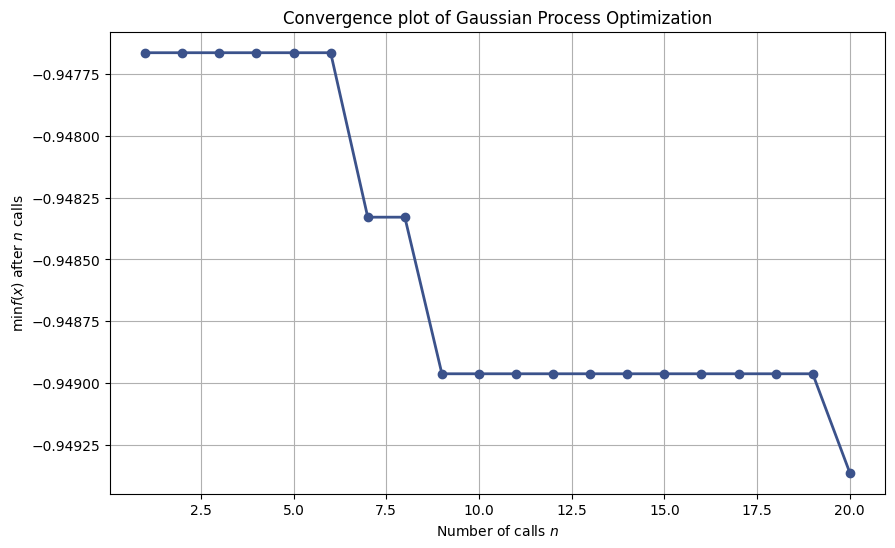

In [6]:
import lightgbm as lgb
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.model_selection import StratifiedKFold
from skopt import gp_minimize
from skopt.space import Real, Integer
from skopt.utils import use_named_args
import os
from sklearn.metrics import make_scorer, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score

# Define paths
BASE_PATH = os.path.abspath('..')
PROCESSED_DATA_PATH = os.path.join(BASE_PATH, 'data', 'processed')

# Load the preprocessed data
X_train = pd.read_csv(os.path.join(PROCESSED_DATA_PATH, 'X_train.csv'))
X_test = pd.read_csv(os.path.join(PROCESSED_DATA_PATH, 'X_test.csv'))
X_valid = pd.read_csv(os.path.join(PROCESSED_DATA_PATH, 'X_valid.csv'))

y_train = pd.read_csv(os.path.join(PROCESSED_DATA_PATH, 'y_train.csv'))
y_test = pd.read_csv(os.path.join(PROCESSED_DATA_PATH, 'y_test.csv'))
y_valid = pd.read_csv(os.path.join(PROCESSED_DATA_PATH, 'y_valid.csv'))

# Define the hyperparameter space for optimization
space = [
    Integer(20, 100, name='num_leaves'),
    Real(0.01, 0.3, name='learning_rate'),
    Real(0.6, 1.0, name='feature_fraction'),
    Real(0.6, 1.0, name='bagging_fraction'),
    Integer(2, 8, name='bagging_freq'),
    Integer(50, 200, name='n_estimators')
]

# Define base parameters that won't be optimized
base_params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    'boosting_type': 'gbdt',
    'verbose': -1,
}

# Define cross-validation function
def cross_validate_lgb(model, X, y, cv=5):
    """
    Perform cross-validation and return multiple metrics
    """
    skf = StratifiedKFold(n_splits=cv, shuffle=True, random_state=42)
    metrics = {
        'roc_auc': [],
        'accuracy': [],
        'precision': [],
        'recall': [],
        'f1': []
    }
    
    for fold, (train_idx, val_idx) in enumerate(skf.split(X, y), 1):
        X_fold_train, X_fold_val = X.iloc[train_idx], X.iloc[val_idx]
        y_fold_train, y_fold_val = y.iloc[train_idx], y.iloc[val_idx]
        
        # Train model
        model.fit(X_fold_train, y_fold_train)
        
        # Make predictions
        y_pred = model.predict(X_fold_val)
        y_pred_proba = model.predict_proba(X_fold_val)[:, 1]
        
        # Calculate metrics
        metrics['roc_auc'].append(roc_auc_score(y_fold_val, y_pred_proba))
        metrics['accuracy'].append(accuracy_score(y_fold_val, y_pred))
        metrics['precision'].append(precision_score(y_fold_val, y_pred))
        metrics['recall'].append(recall_score(y_fold_val, y_pred))
        metrics['f1'].append(f1_score(y_fold_val, y_pred))
        
    return {k: np.mean(v) for k, v in metrics.items()}

# Define the objective function for optimization
@use_named_args(space)
def objective(**params):
    # Combine base parameters with optimizable parameters
    all_params = {**base_params, **params}
    
    try:
        # Create model
        model = lgb.LGBMClassifier(**all_params)
        
        # Perform cross-validation
        cv_results = cross_validate_lgb(model, X_train, y_train['target'])
        
        # Use ROC-AUC as the optimization metric
        score = cv_results['roc_auc']
        
        # Print current iteration results
        print(f"Parameters: {params}")
        print(f"CV Results: {cv_results}")
        
        # Return negative score because skopt minimizes
        return -score
        
    except Exception as e:
        print(f"Error in training: {str(e)}")
        return 999.0

# Run the Gaussian Process optimization
n_calls = 20
results = gp_minimize(
    func=objective,
    dimensions=space,
    n_calls=n_calls,
    n_random_starts=10,
    noise=0.01,
    random_state=42
)

# Get the best parameters
best_params = {
    'num_leaves': results.x[0],
    'learning_rate': results.x[1],
    'feature_fraction': results.x[2],
    'bagging_fraction': results.x[3],
    'bagging_freq': results.x[4],
    'n_estimators': results.x[5]
}

print("\nBest parameters found:")
for param, value in best_params.items():
    print(f"{param}: {value}")

# Train final model with best parameters using cross-validation
final_params = {**base_params, **best_params}
final_scores = []
final_models = []

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

print("\nTraining final models with cross-validation...")

for fold, (train_idx, val_idx) in enumerate(skf.split(X_train, y_train['target']), 1):
    X_fold_train, X_fold_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_fold_train, y_fold_val = y_train.iloc[train_idx], y_train.iloc[val_idx]
    
    model = lgb.LGBMClassifier(**final_params)
    model.fit(X_fold_train, y_fold_train)
    
    y_pred = model.predict(X_fold_val)
    y_pred_proba = model.predict_proba(X_fold_val)[:, 1]
    
    score = roc_auc_score(y_fold_val, y_pred_proba)
    final_scores.append(score)
    final_models.append(model)
    
    print(f"Fold {fold} ROC-AUC: {score:.4f}")

print(f"\nMean CV ROC-AUC: {np.mean(final_scores):.4f} (+/- {np.std(final_scores):.4f})")

# Select best model based on validation performance
best_model_idx = np.argmax(final_scores)
best_model = final_models[best_model_idx]

# Evaluate on test set
test_pred = best_model.predict(X_test)
test_pred_proba = best_model.predict_proba(X_test)[:, 1]

print("\nTest Set Performance:")
print(f"Accuracy: {accuracy_score(y_test['target'], test_pred):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test['target'], test_pred_proba):.4f}")
print("\nClassification Report:")
print(classification_report(y_test['target'], test_pred))

# Feature importance analysis
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': best_model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

print('\nTop 10 Most Important Features:')
print(feature_importance.head(10))

# Plot optimization results
from skopt.plots import plot_convergence
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plot_convergence(results)
plt.title('Convergence plot of Gaussian Process Optimization')
plt.show()

# Save the best model
from joblib import dump
dump(best_model, 'lightgbm_model_optimized.joblib')

# Save optimization history
optimization_history = pd.DataFrame({
    'iteration': range(len(results.func_vals)),
    'score': -results.func_vals,
    'num_leaves': [x[0] for x in results.x_iters],
    'learning_rate': [x[1] for x in results.x_iters],
    'feature_fraction': [x[2] for x in results.x_iters],
    'bagging_fraction': [x[3] for x in results.x_iters],
    'bagging_freq': [x[4] for x in results.x_iters],
    'n_estimators': [x[5] for x in results.x_iters]
})
optimization_history.to_csv('optimization_history.csv', index=False)

# Save cross-validation results
cv_results_df = pd.DataFrame({
    'fold': range(1, 6),
    'roc_auc': final_scores
})
cv_results_df.to_csv('cv_results.csv', index=False)

### Gaussian Process Optimization

In [9]:
import lightgbm as lgb
import pandas as pd
import numpy as np
from sklearn.metrics import (accuracy_score, classification_report, roc_auc_score,
                           f1_score, precision_score, recall_score)
from sklearn.model_selection import StratifiedKFold
from skopt import gp_minimize, plots
from skopt.space import Real, Integer, Categorical
from skopt.utils import use_named_args
from skopt.plots import plot_convergence, plot_objective
import matplotlib.pyplot as plt
import os
from joblib import dump, load
import warnings
warnings.filterwarnings('ignore')

# Define paths
BASE_PATH = os.path.abspath('..')
PROCESSED_DATA_PATH = os.path.join(BASE_PATH, 'data', 'processed')

# Load data
X_train = pd.read_csv(os.path.join(PROCESSED_DATA_PATH, 'X_train.csv'))
X_test = pd.read_csv(os.path.join(PROCESSED_DATA_PATH, 'X_test.csv'))
X_valid = pd.read_csv(os.path.join(PROCESSED_DATA_PATH, 'X_valid.csv'))

y_train = pd.read_csv(os.path.join(PROCESSED_DATA_PATH, 'y_train.csv'))
y_test = pd.read_csv(os.path.join(PROCESSED_DATA_PATH, 'y_test.csv'))
y_valid = pd.read_csv(os.path.join(PROCESSED_DATA_PATH, 'y_valid.csv'))

# Define optimization space
space = [
    Integer(20, 100, name='num_leaves'),
    Real(0.01, 0.3, name='learning_rate'),
    Real(0.6, 1.0, name='feature_fraction'),
    Real(0.6, 1.0, name='bagging_fraction'),
    Integer(2, 8, name='bagging_freq'),
    Integer(50, 200, name='n_estimators'),
    Categorical(['gbdt', 'dart'], name='boosting_type'),
    Real(0.1, 10.0, name='reg_alpha'),
    Real(0.1, 10.0, name='reg_lambda'),
    Integer(15, 50, name='min_child_samples')
]

class OptimizationLogger:
    def __init__(self):
        self.current_iteration = 0
        self.log_data = []
        
    def update(self, cv_scores, params):
        log_entry = {
            'iteration': self.current_iteration,
            **cv_scores,
            **params
        }
        self.log_data.append(log_entry)
        self.current_iteration += 1
        
    def get_log_df(self):
        return pd.DataFrame(self.log_data)

logger = OptimizationLogger()

def calculate_metrics(y_true, y_pred, y_pred_proba):
    """
    Calculate multiple metrics for evaluation
    """
    return {
        'accuracy': accuracy_score(y_true, y_pred),
        'roc_auc': roc_auc_score(y_true, y_pred_proba),
        'f1_weighted': f1_score(y_true, y_pred, average='weighted'),
        'precision_weighted': precision_score(y_true, y_pred, average='weighted'),
        'recall_weighted': recall_score(y_true, y_pred, average='weighted')
    }

def cross_validate_lgb(params, X, y, n_splits=5):
    """
    Perform cross-validation for LightGBM with given parameters
    """
    base_params = {
        'objective': 'binary',
        'metric': 'binary_logloss',
        'verbose': -1
    }
    all_params = {**base_params, **params}
    
    fold_scores = []
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    
    for fold, (train_idx, val_idx) in enumerate(skf.split(X, y), 1):
        X_fold_train = X.iloc[train_idx]
        y_fold_train = y.iloc[train_idx]
        X_fold_val = X.iloc[val_idx]
        y_fold_val = y.iloc[val_idx]
        
        model = lgb.LGBMClassifier(**all_params)
        model.fit(X_fold_train, y_fold_train)
        
        y_pred = model.predict(X_fold_val)
        y_pred_proba = model.predict_proba(X_fold_val)[:, 1]
        
        metrics = calculate_metrics(y_fold_val, y_pred, y_pred_proba)
        fold_scores.append(metrics)
    
    # Calculate mean and std for each metric
    mean_scores = {}
    std_scores = {}
    for metric in fold_scores[0].keys():
        values = [score[metric] for score in fold_scores]
        mean_scores[f'{metric}_mean'] = np.mean(values)
        std_scores[f'{metric}_std'] = np.std(values)
    
    return {**mean_scores, **std_scores}

@use_named_args(space)
def objective(**params):
    """
    Objective function to minimize
    """
    try:
        cv_scores = cross_validate_lgb(params, X_train, y_train['target'])
        logger.update(cv_scores, params)
        
        print(f"\nIteration {logger.current_iteration}:")
        print(f"ROC AUC: {cv_scores['roc_auc_mean']:.4f} (±{cv_scores['roc_auc_std']:.4f})")
        print(f"F1 Weighted: {cv_scores['f1_weighted_mean']:.4f} (±{cv_scores['f1_weighted_std']:.4f})")
        print("Parameters:", params)
        print("-" * 50)
        
        # Use a combination of ROC AUC and F1 weighted as optimization metric
        optimization_score = (cv_scores['roc_auc_mean'] + cv_scores['f1_weighted_mean']) / 2
        return -optimization_score  # Negative because we want to maximize
    
    except Exception as e:
        print(f"Error in iteration: {str(e)}")
        return 999.0

def train_final_model(best_params):
    """
    Train the final model using the best parameters found
    """
    base_params = {
        'objective': 'binary',
        'metric': 'binary_logloss',
        'verbose': -1
    }
    final_params = {**base_params, **best_params}
    
    model = lgb.LGBMClassifier(**final_params)
    model.fit(X_train, y_train['target'])
    
    return model

def evaluate_model(model, X, y, dataset_name=""):
    """
    Evaluate model performance with additional metrics
    """
    y_pred = model.predict(X)
    y_pred_proba = model.predict_proba(X)[:, 1]
    
    metrics = calculate_metrics(y, y_pred, y_pred_proba)
    
    print(f"\n{dataset_name} Performance:")
    print(f"Accuracy: {metrics['accuracy']:.4f}")
    print(f"ROC AUC: {metrics['roc_auc']:.4f}")
    print(f"F1 Weighted: {metrics['f1_weighted']:.4f}")
    print(f"Precision Weighted: {metrics['precision_weighted']:.4f}")
    print(f"Recall Weighted: {metrics['recall_weighted']:.4f}")
    print("\nClassification Report:")
    print(classification_report(y, y_pred))
    
    return metrics

def plot_optimization_results(result, optimization_log):
    """
    Plot optimization results with multiple metrics
    """
    plt.figure(figsize=(15, 5))
    
    # Convergence plot
    plt.subplot(1, 3, 1)
    plot_convergence(result)
    plt.title("Convergence plot")
    
    # ROC AUC progression
    plt.subplot(1, 3, 2)
    plt.plot(optimization_log['iteration'], optimization_log['roc_auc_mean'])
    plt.fill_between(
        optimization_log['iteration'],
        optimization_log['roc_auc_mean'] - optimization_log['roc_auc_std'],
        optimization_log['roc_auc_mean'] + optimization_log['roc_auc_std'],
        alpha=0.2
    )
    plt.title("ROC AUC progression")
    plt.xlabel("Iteration")
    plt.ylabel("Score")
    
    # F1 Weighted progression
    plt.subplot(1, 3, 3)
    plt.plot(optimization_log['iteration'], optimization_log['f1_weighted_mean'])
    plt.fill_between(
        optimization_log['iteration'],
        optimization_log['f1_weighted_mean'] - optimization_log['f1_weighted_std'],
        optimization_log['f1_weighted_mean'] + optimization_log['f1_weighted_std'],
        alpha=0.2
    )
    plt.title("F1 Weighted progression")
    plt.xlabel("Iteration")
    plt.ylabel("Score")
    
    plt.tight_layout()
    plt.savefig('optimization_results.png')
    plt.close()

# Run optimization
n_calls = 50
result = gp_minimize(
    func=objective,
    dimensions=space,
    n_calls=n_calls,
    n_random_starts=10,
    noise=0.01,
    random_state=42
)

# Get optimization log
optimization_log = logger.get_log_df()

# Get best parameters
best_params = dict(zip([dim.name for dim in space], result.x))

print("\nBest parameters found:")
for param, value in best_params.items():
    print(f"{param}: {value}")

# Train final model
final_model = train_final_model(best_params)

# Evaluate model
test_metrics = evaluate_model(final_model, X_test, y_test['target'], "Test Set")
valid_metrics = evaluate_model(final_model, X_valid, y_valid['target'], "Validation Set")

# Plot results
plot_optimization_results(result, optimization_log)

# Feature importance analysis
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': final_model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(feature_importance['feature'].head(20), feature_importance['importance'].head(20))
plt.xticks(rotation=45, ha='right')
plt.title('Top 20 Feature Importance')
plt.tight_layout()
plt.savefig('feature_importance.png')
plt.close()

# Save results
dump(final_model, 'final_model.joblib')
optimization_log.to_csv('optimization_log.csv', index=False)
feature_importance.to_csv('feature_importance.csv', index=False)

# Save metrics history
metrics_history = pd.DataFrame({
    'Metric': ['ROC AUC', 'F1 Weighted', 'Precision Weighted', 'Recall Weighted'],
    'Test Score': [test_metrics[m] for m in ['roc_auc', 'f1_weighted', 'precision_weighted', 'recall_weighted']],
    'Validation Score': [valid_metrics[m] for m in ['roc_auc', 'f1_weighted', 'precision_weighted', 'recall_weighted']]
})
metrics_history.to_csv('metrics_history.csv', index=False)

# Generate optimization summary
summary = pd.DataFrame({
    'Parameter': best_params.keys(),
    'Optimal Value': best_params.values()
})
summary.to_csv('optimization_summary.csv', index=False)

print("\nOptimization completed. Results saved to files:")
print("- final_model.joblib")
print("- optimization_log.csv")
print("- feature_importance.csv")
print("- optimization_summary.csv")
print("- metrics_history.csv")
print("- optimization_results.png")
print("- feature_importance.png")


Iteration 1:
ROC AUC: 0.9483 (±0.0042)
F1 Weighted: 0.9087 (±0.0045)
Parameters: {'num_leaves': np.int64(84), 'learning_rate': 0.0631960890611875, 'feature_fraction': 0.9118764001091078, 'bagging_fraction': 0.8387400631785948, 'bagging_freq': np.int64(5), 'n_estimators': np.int64(65), 'boosting_type': 'gbdt', 'reg_alpha': 3.403715250276317, 'reg_lambda': 1.514381497427214, 'min_child_samples': np.int64(38)}
--------------------------------------------------

Iteration 2:
ROC AUC: 0.9473 (±0.0035)
F1 Weighted: 0.9094 (±0.0031)
Parameters: {'num_leaves': np.int64(25), 'learning_rate': 0.2193796439573792, 'feature_fraction': 0.9754210836063002, 'bagging_fraction': 0.6003115063364057, 'bagging_freq': np.int64(8), 'n_estimators': np.int64(143), 'boosting_type': 'dart', 'reg_alpha': 0.16995642167520236, 'reg_lambda': 0.3283180079100161, 'min_child_samples': np.int64(33)}
--------------------------------------------------

Iteration 3:
ROC AUC: 0.9440 (±0.0041)
F1 Weighted: 0.9063 (±0.0039)
